In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
%matplotlib inline

Phase 1: Business Understanding

Some questions asked:
1. What are the patterns in developer collaboration and communication?
2. What are the adoption patterns for new technologies?
3. How do developer problem-solving patterns evolve?
4. In what way does companies influence developer careers?

In [2]:
# Phase 2: Data Understanding
df = pd.read_csv('survey_results_public.csv')

print("Dataset Overview:")
print(f"Number of records: {len(df)}")
print(f"Number of features: {len(df.columns)}")

print("\nFeatures Informations:")
print(f"Description: {df.describe}")
for cols in df.columns:
    print(f"Missing values: {df[cols].isna().sum()}")

Dataset Overview:
Number of records: 64461
Number of features: 61

Features Informations:
Description: <bound method NDFrame.describe of        Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                    

In [3]:
# Phase 3: Data Preparation

df = df.replace('NA', np.nan)

df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['WorkWeekHrs'] = pd.to_numeric(df['WorkWeekHrs'], errors='coerce')

program_langs = df['LanguageWorkedWith'].str.get_dummies(sep=';')
df = pd.concat([df, program_langs], axis=1)

In [4]:
# Phase 4: Modeling
feature_cols = ['YearsCode', 'YearsCodePro', 'WorkWeekHrs'] + list(program_langs.columns)

data = df[feature_cols + ['JobSat']].notna().all(axis=1)

X = df.loc[data, feature_cols]
y = df.loc[data, 'JobSat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

C:\Users\ltolu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Perfromance Metrics:
Accurancy: 0.3374
Precision: 0.2804
Recall: 0.3374
F1 Score: 0.2621


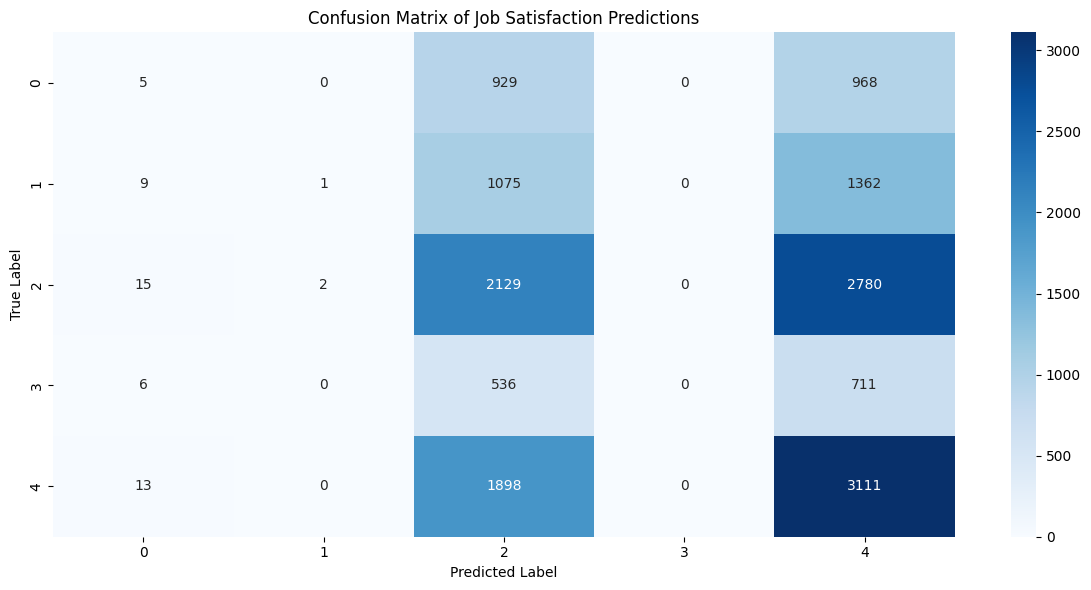

In [5]:
# Phase 5: Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Perfromance Metrics:")
print(f'Accurancy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

plt.figure(figsize=(12, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Job Satisfaction Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


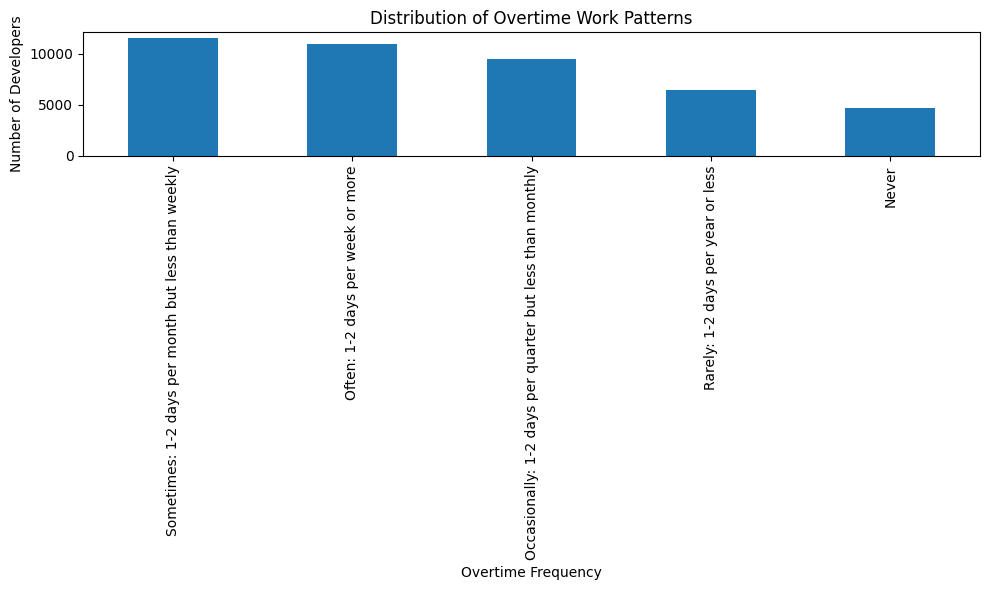

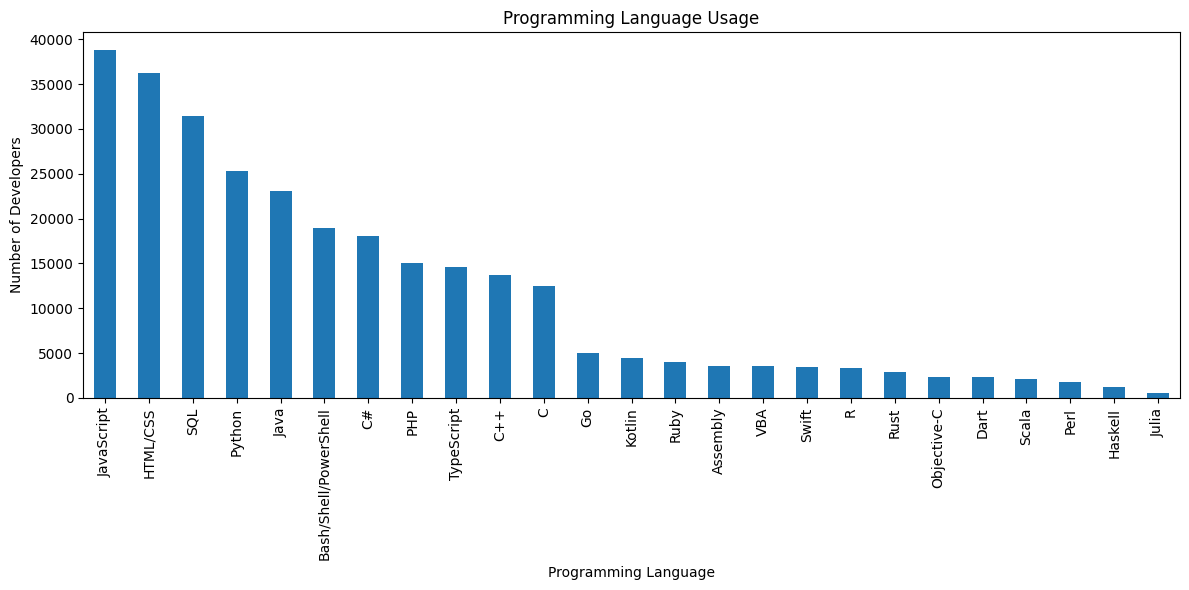

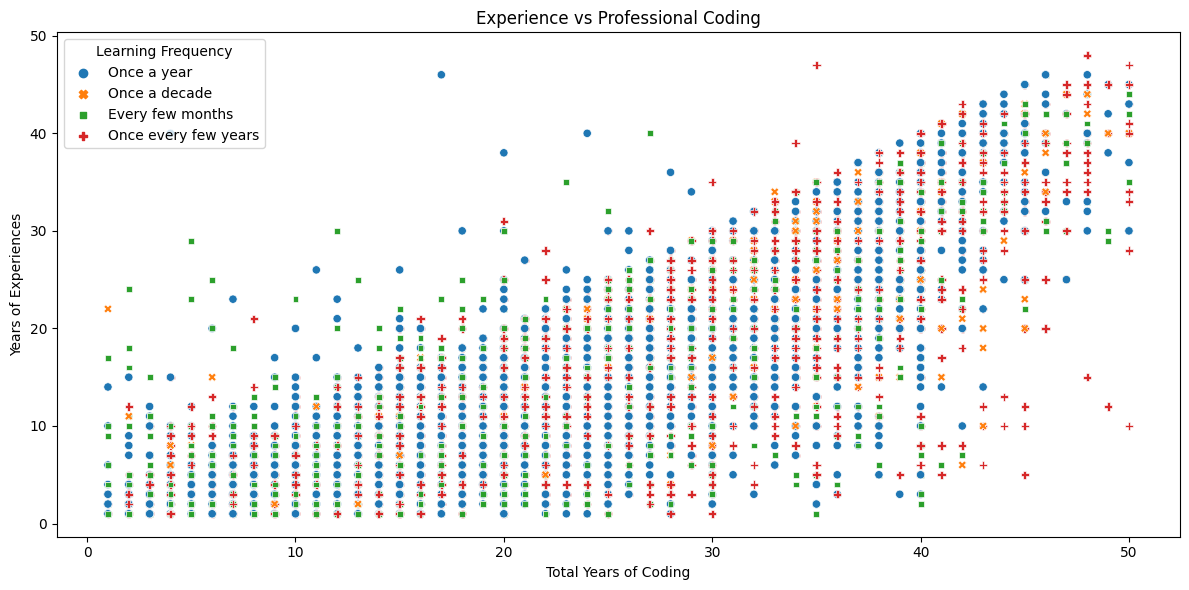

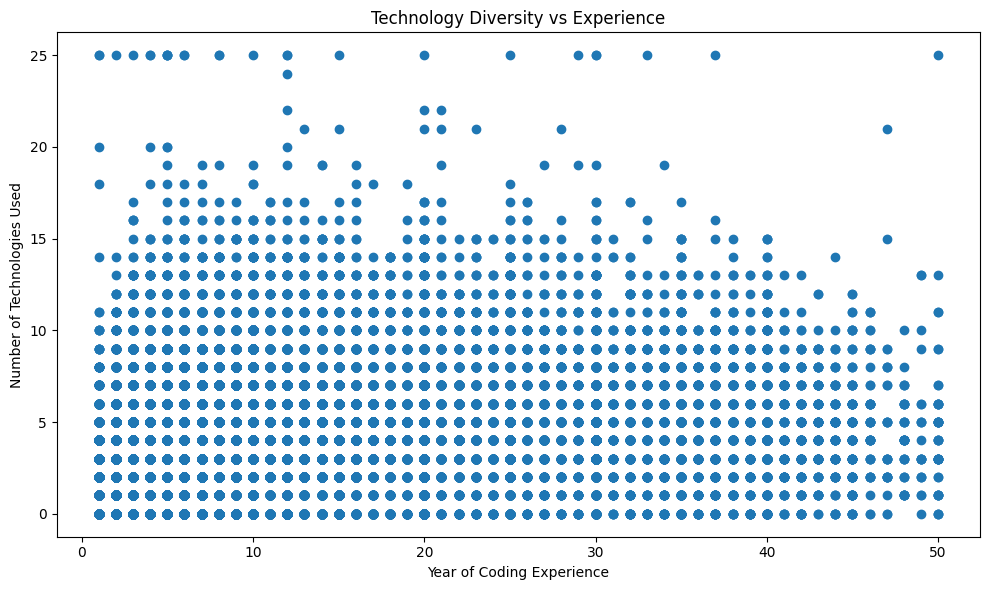

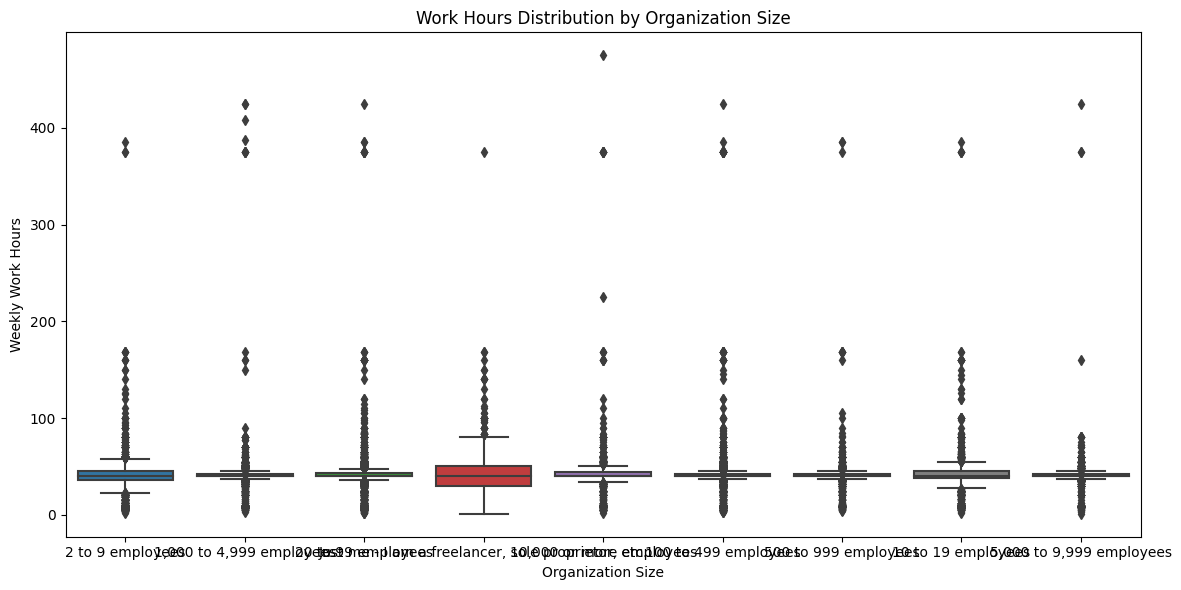

<Figure size 1500x1000 with 0 Axes>

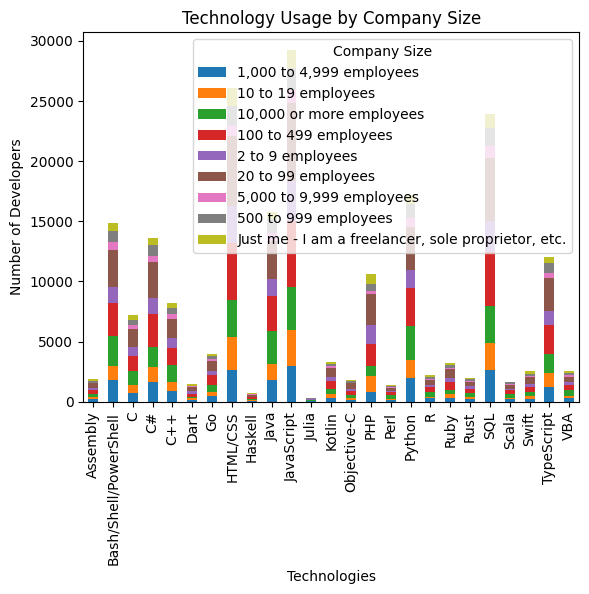

In [6]:
# Analysis of business questions
# 1. Answering: What are the patterns in developer collaboration and communication?
plt.figure(figsize=(10, 6))
df['NEWOvertime'].value_counts().plot(kind='bar')
plt.title('Distribution of Overtime Work Patterns')
plt.xlabel('Overtime Frequency')
plt.ylabel('Number of Developers')
plt.tight_layout()
plt.show()

# 2. Answering: 2. What are the adoption patterns for new technologies?
plt.figure(figsize=(12, 6))
langs_adoption = program_langs.sum().sort_values(ascending=False)
langs_adoption.plot(kind='bar')
plt.title('Programming Language Usage')
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers')
plt.tight_layout()
plt.show()

# 3. Answering: How does developer problem-solving patterns evolve?
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='YearsCode', y='YearsCodePro', hue='NEWLearn', style='NEWLearn')
plt.title('Experience vs Professional Coding')
plt.xlabel('Total Years of Coding')
plt.ylabel('Years of Experiences')
plt.legend(title='Learning Frequency')
plt.tight_layout()
plt.show()

tech_diverse = program_langs.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsCode'], tech_diverse)
plt.title('Technology Diversity vs Experience')
plt.xlabel('Year of Coding Experience')
plt.ylabel('Number of Technologies Used')
plt.tight_layout()
plt.show()

# 4. Answering: In what way does companies influence developer careers?
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='OrgSize', y='WorkWeekHrs')
plt.title('Work Hours Distribution by Organization Size')
plt.xlabel('Organization Size')
plt.ylabel('Weekly Work Hours')
plt.tight_layout()
plt.show()

tech_size = df.groupby('OrgSize')[program_langs.columns].sum()
plt.figure(figsize=(15, 10))
tech_size.T.plot(kind='bar', stacked=True)
plt.title('Technology Usage by Company Size')
plt.xlabel('Technologies')
plt.ylabel('Number of Developers')
plt.legend(title='Company Size')
plt.show()
